# EDA

* Start EDA here.... 

In [22]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

root = 'data/'

## Circuits

In [12]:
circuits = pd.read_csv(root+'circuits.csv')

In [13]:
circuits.shape

(77, 9)

In [14]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [17]:
hosting_countries = circuits['country'].unique()

In [18]:
hosting_countries

array(['Australia', 'Malaysia', 'Bahrain', 'Spain', 'Turkey', 'Monaco',
       'Canada', 'France', 'UK', 'Germany', 'Hungary', 'Belgium', 'Italy',
       'Singapore', 'Japan', 'China', 'Brazil', 'USA', 'United States',
       'UAE', 'Argentina', 'Portugal', 'South Africa', 'Mexico', 'Korea',
       'Netherlands', 'Sweden', 'Austria', 'Morocco', 'Switzerland',
       'India', 'Russia', 'Azerbaijan', 'Saudi Arabia', 'Qatar'],
      dtype=object)

In [19]:
circuits.loc[circuits['country'] == 'United States', 'country'] = 'USA'

In [20]:
hosting_countries = circuits['country'].unique()

In [21]:
hosting_countries

array(['Australia', 'Malaysia', 'Bahrain', 'Spain', 'Turkey', 'Monaco',
       'Canada', 'France', 'UK', 'Germany', 'Hungary', 'Belgium', 'Italy',
       'Singapore', 'Japan', 'China', 'Brazil', 'USA', 'UAE', 'Argentina',
       'Portugal', 'South Africa', 'Mexico', 'Korea', 'Netherlands',
       'Sweden', 'Austria', 'Morocco', 'Switzerland', 'India', 'Russia',
       'Azerbaijan', 'Saudi Arabia', 'Qatar'], dtype=object)

> Contains data about countires that have hosted F1 races

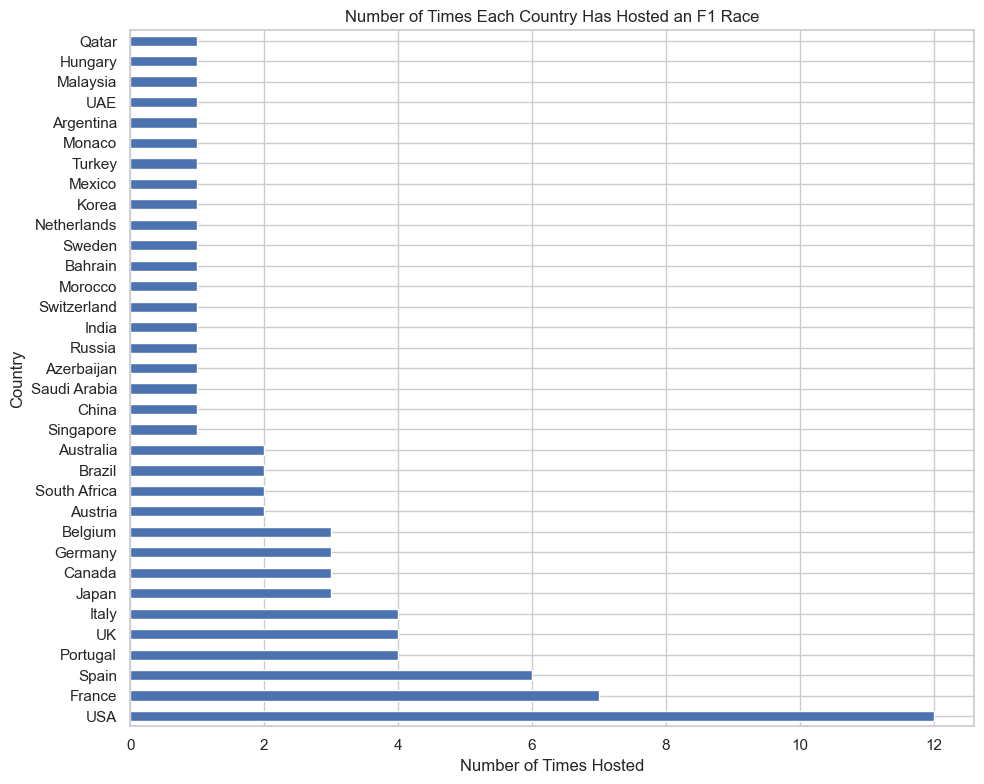

In [26]:
circuit = pd.DataFrame(circuits, columns=['country'])
# Counting how many times each country has hosted an F1 race
country_counts = circuit['country'].value_counts()

# Plotting
plt.figure(figsize=(10,8))
country_counts.plot(kind='barh')
plt.xlabel('Number of Times Hosted')
plt.ylabel('Country')
plt.title('Number of Times Each Country Has Hosted an F1 Race')
plt.tight_layout()
plt.show()

## constructor_results, constructor_standings, constructors

In [35]:
constructor_results = pd.read_csv(root+'constructor_results.csv')

In [36]:
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [37]:
constructor_results.shape

(12290, 5)

In [31]:
constructor_standings = pd.read_csv(root+'constructor_standings.csv')

In [33]:
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [46]:
constructor_standings.constructorId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   9,  11,  10,   8,  13,  14,
        17,  16,  15,  18,  19,  21,  22,  20,  24,  25,  26,  27,  29,
        28,  30,  31,  33,  32,  34,  35,  37,  36,  42,  41,  39,  40,
        44,  45,  46,  23,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  60,  59, 204,  61,  62, 182,  64,  63,  65,  66,
        67,  68,  69,  71,  70,  72,  73, 202,  75,  74,  76, 203,  80,
        78,  77,  79,  81,  82,  83,  84, 199, 200, 180, 201,  86, 187,
       198,  85, 191, 196, 167, 197, 183,  89, 190, 194, 195, 170, 176,
       184, 172, 189, 188,  91, 192, 181, 185,  94,  95,  92,  96,  97,
       177, 179, 173,  98,  99, 175,  87, 100, 174, 178, 101, 103, 123,
       118, 106, 169, 117, 105, 171, 104, 125, 127, 113, 168, 124, 193,
        90, 186,  93, 131, 205, 164, 166, 206, 207, 208,  12, 209, 210,
       211, 213, 214])

In [38]:
constructor_standings.shape

(13051, 7)

> constructor_standings.csv already has the data from constructor_results.csv, so we can ignore the dataframe 

In [39]:
constructors = pd.read_csv(root+'constructors.csv')

In [40]:
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [45]:
constructor.constructorId.unique()

array([  1,   2,   3,   4,   5,   6,   7,   9,  11,  10,   8,  13,  14,
        17,  16,  15,  18,  19,  21,  22,  20,  24,  25,  26,  27,  29,
        28,  30,  31,  33,  32,  34,  35,  37,  36,  42,  41,  39,  40,
        44,  45,  46,  23,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  60,  59, 204,  61,  62, 182,  64,  63,  65,  66,
        67,  68,  69,  71,  70,  72,  73, 202,  75,  74,  76, 203,  80,
        78,  77,  79,  81,  82,  83,  84, 199, 200, 180, 201,  86, 187,
       198,  85, 191, 196, 167, 197, 183,  89, 190, 194, 195, 170, 176,
       184, 172, 189, 188,  91, 192, 181, 185,  94,  95,  92,  96,  97,
       177, 179, 173,  98,  99, 175,  87, 100, 174, 178, 101, 103, 123,
       118, 106, 169, 117, 105, 171, 104, 125, 127, 113, 168, 124, 193,
        90, 186,  93, 131, 205, 164, 166, 206, 207, 208,  12, 209, 210,
       211, 213, 214])

In [41]:
constructors.shape

(211, 5)

In [48]:
constructors_merged = pd.merge(constructor_standings, constructors, on='constructorId')

In [49]:
constructors_merged.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name,nationality,url
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,7,19,1,24.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,18,20,1,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,29,21,1,34.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,40,22,1,42.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren


In [51]:
constructors_merged.shape

(13051, 11)

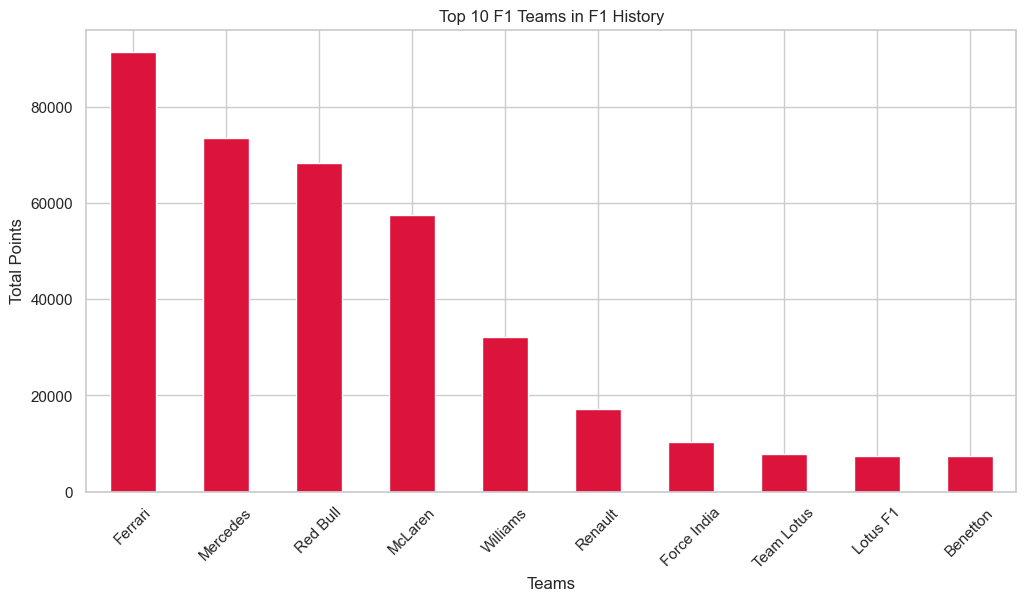

In [64]:
top = constructors_merged.groupby('name')['points'].sum()
top = top.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top.plot(kind='bar', color='crimson')
plt.xlabel('Teams')
plt.ylabel('Total Points')
plt.title('Top 10 F1 Teams in F1 History')
plt.xticks(rotation=45)
plt.show()

/var/folders/1q/p62jltqs1g10s6hzbjjqmw8c0000gq/T/ipykernel_99508/1267466812.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='races', y='name', data=teams, palette='rocket')


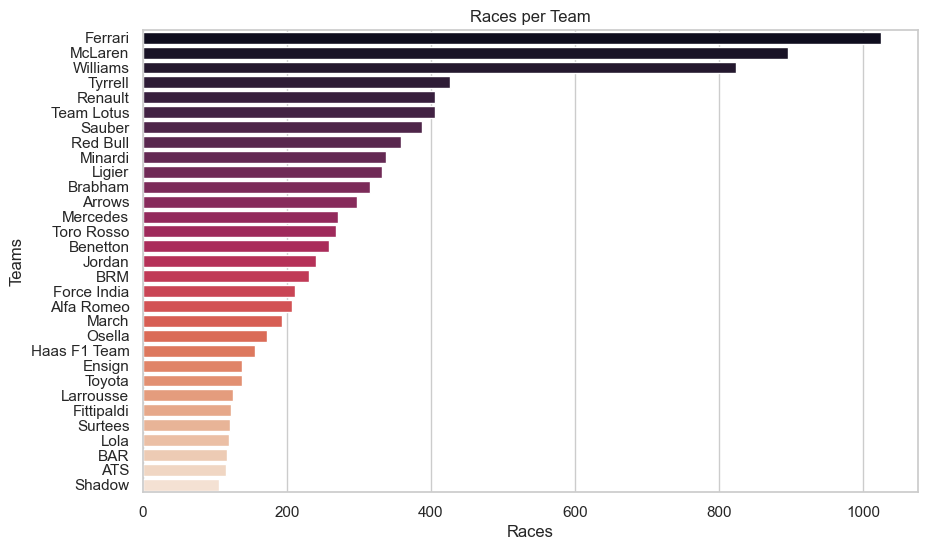

In [71]:
teams = constructors_merged[['name','points','raceId']]
teams = teams.groupby('name')['raceId'].nunique().sort_values(ascending = False).reset_index(name = 'races')
teams = teams[teams['races'] >= 100]
plt.figure(figsize=(10, 6))
sns.barplot(x='races', y='name', data=teams, palette='rocket') 
plt.xlabel('Races')  
plt.ylabel('Teams')  
plt.title('Races per Team')  
plt.show()

## driver_standings, drivers

In [72]:
driver_standings = pd.read_csv(root+'driver_standings.csv')

In [74]:
driver_standings.shape

(34124, 7)

In [73]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [75]:
drivers = pd.read_csv(root+'drivers.csv')

In [78]:
drivers.shape

(857, 9)

In [77]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [80]:
drivers_merged = pd.merge(driver_standings, drivers, on='driverId')

In [81]:
drivers_merged.shape

(34124, 15)

In [83]:
drivers_merged.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,number,code,forename,surname,dob,nationality,url
0,1,18,1,10.0,1,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,9,19,1,14.0,1,1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
2,27,20,1,14.0,3,3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,48,21,1,20.0,2,2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
4,69,22,1,28.0,3,3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton


In [84]:
top_drivers_by_points = drivers_merged.groupby('driverId')['points'].sum().sort_values(ascending=False).head(10)
top_drivers_by_points

driverId
1      46550.5
20     32026.0
830    22486.5
4      21692.0
822    19458.0
8      19069.0
3      16910.0
30     14514.0
815    13756.0
817    13626.0
Name: points, dtype: float64

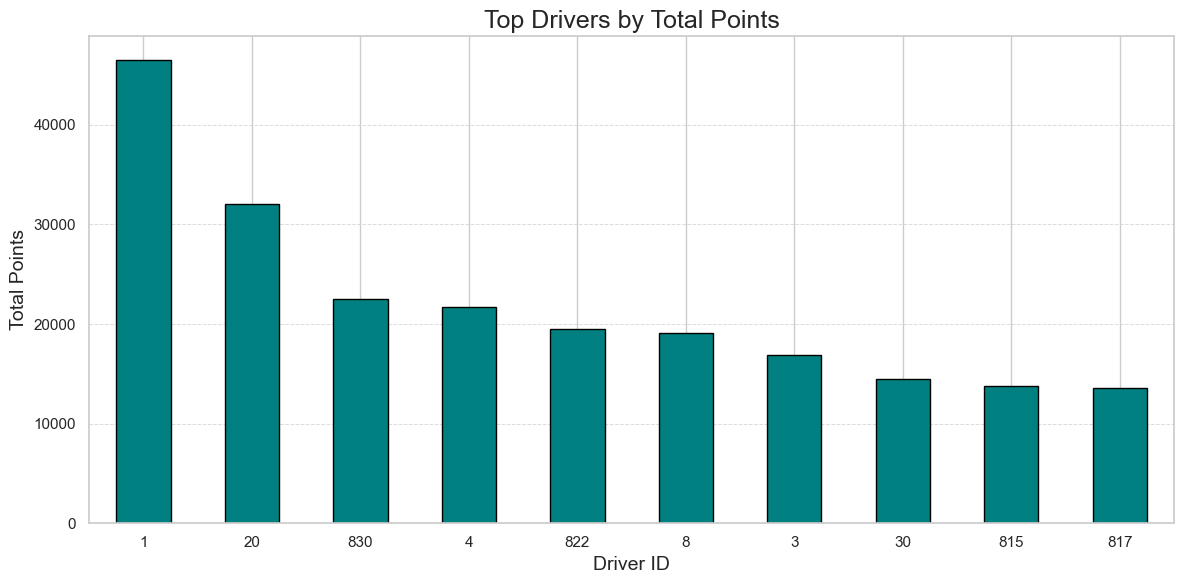

In [85]:
plt.figure(figsize=(12, 6))
top_drivers_by_points.plot(kind='bar', color='teal', edgecolor='black')

# Adding enhancements to the plot.
plt.title('Top Drivers by Total Points', fontsize=18)
plt.xlabel('Driver ID', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

# Show the plot.
plt.show()

In [86]:
top_drivers_by_wins = drivers_merged.groupby('driverId')['wins'].sum().sort_values(ascending=False).head(10)
top_drivers_by_wins

driverId
1      1019
30      849
20      517
117     472
830     419
102     394
4       346
3       269
95      258
182     224
Name: wins, dtype: int64

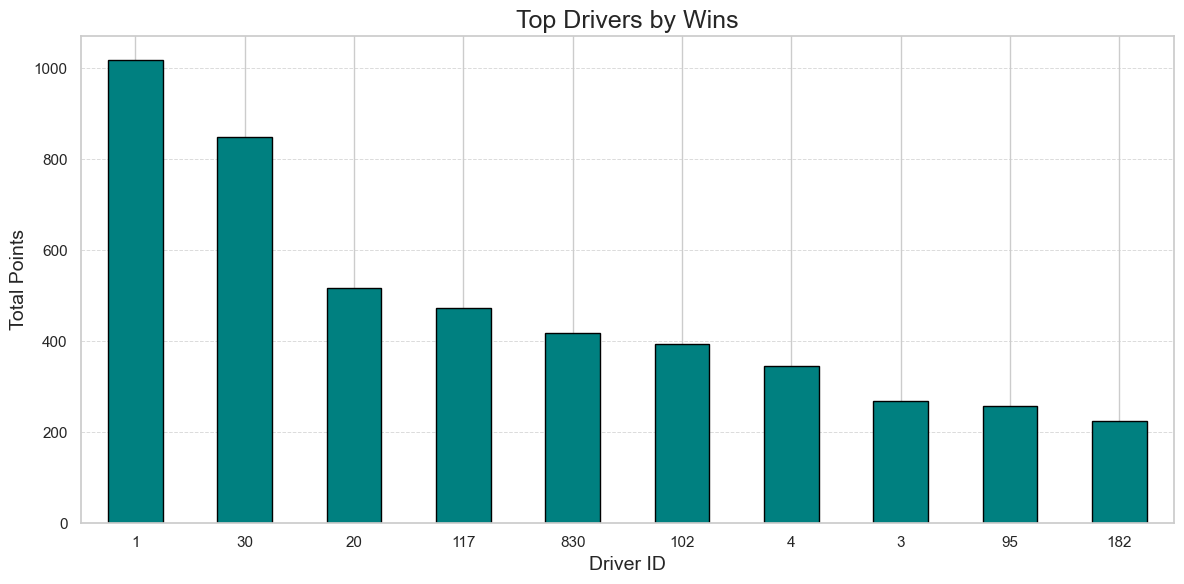

In [88]:
plt.figure(figsize=(12, 6))
top_drivers_by_wins.plot(kind='bar', color='teal', edgecolor='black')

# Adding enhancements to the plot.
plt.title('Top Drivers by Wins', fontsize=18)
plt.xlabel('Driver ID', fontsize=14)
plt.ylabel('Total Points', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

# Show the plot.
plt.show()